In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from aux_func import bwLabel
from aux_func import psColor

*1.1*

In [2]:
image = cv2.imread('imageDatabase/lego01.jpg')

In [3]:
cv2.imshow('Image',image)    
cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:
imgColor = cv2.cvtColor(image, cv2.COLOR_BGRA2GRAY)

cv2.imshow ('Image', imgColor)

cv2.waitKey(0)
cv2.destroyAllWindows()

*1.2*

In [5]:
# cam = cv2.VideoCapture(0)

# while True:
#     ret, frame = cam.read()

#     cv2.imshow('Camera', frame)

#     if (cv2.waitKey(1) == ord('q')) :
#         break
# cam.release()
# cv2.destroyAllWindows()


*1.3*

In [6]:
imgResize = cv2.resize(image,(1000,1000),fx=10,fy=10,interpolation=cv2.INTER_CUBIC)

cv2.imshow ('Image', imgResize)

cv2.waitKey(0)
cv2.destroyAllWindows()

*2.0*
Exercício 2.1 – Cromakey (blue screening);


In [7]:
newImage = cv2.imread('imageDatabase/falcon.jpg')
mask = cv2.imread('imageDatabase/mask.png')
background = cv2.imread('imageDatabase/florest.jpg')
imageOut = cv2.multiply(newImage/255,mask/255)
backgroundMask = cv2.multiply(background/255,(255-mask)/255)
imageFinal = cv2.add(imageOut,backgroundMask)


cv2.imshow('Image',imageFinal)
cv2.waitKey(0)
cv2.destroyAllWindows()

Repetir este exercicio sem usar a mask

Usar cv2.inRange

(500, 400, 3)
(500, 400)


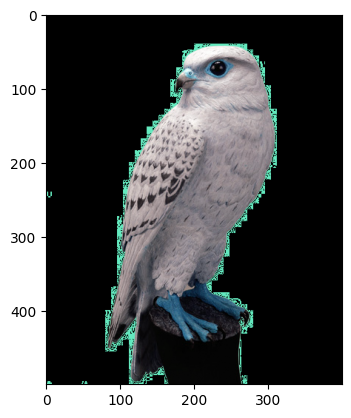

In [8]:
Image2 = cv2.imread('imageDatabase/falcon.jpg')
mask2 = cv2.inRange(Image2,np.array([81,236,192]),np.array([121,256,212]))
print(Image2.shape)
print(mask2.shape)
mask2 = 255 - mask2
mask2 = cv2.cvtColor(mask2,cv2.COLOR_GRAY2RGB)
background2 = cv2.imread('imageDatabase/florest.jpg')
imageOut2 = cv2.multiply(Image2/255,mask2/255)
backgroundMask2 = cv2.multiply(background2/255,(255-mask2)/255)
FinalImage = cv2.add(imageOut2,backgroundMask2)

# cv2.imshow('Image',imageOut2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(imageOut2)

Exercício 2.2 – Filtragem de média e mediana;


In [9]:
blurImage = cv2.blur(imageFinal,(10,10))
cv2.imshow('Image',blurImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

Exercicio 2.3 - Transformações geométricas

In [10]:
#Rotação

height, width = imageFinal.shape[:2]
center = (width/2,height/2)

getRotated = cv2.getRotationMatrix2D(center=center,angle=180,scale=1)

rotatedImage = cv2.warpAffine(src=imageFinal,M=getRotated,dsize=(width,height))

cv2.imshow("Rotated Image", rotatedImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#Translação

M = np.float32([[1,0,47],[0,1,65]])
translatedImage = cv2.warpAffine(src=imageFinal,M=M,dsize=(width,height))

cv2.imshow("Translated Image", translatedImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

Exercicio 3.1 - Histograma de uma imagem


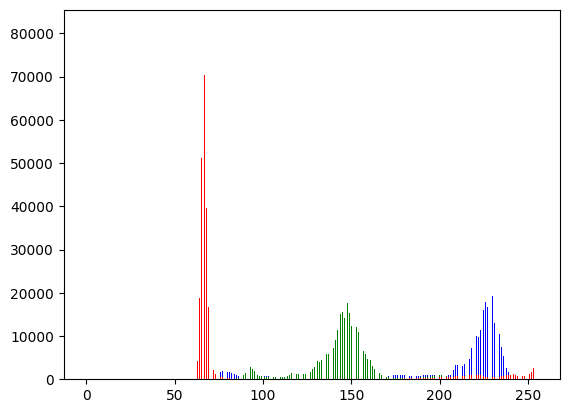

In [12]:
# imageGray = cv2.cvtColor(imageFinal,cv2.COLOR_RGB2GRAY)
brainImage = cv2.imread('imageDatabase/lego11.jpg')
brainGray = cv2.cvtColor(brainImage,cv2.COLOR_BGR2GRAY)
hist0 = cv2.calcHist([brainImage],[0],None,[256],(0,255)) # channel 0 --> blue 1--> green 2--> red
hist1 = cv2.calcHist([brainImage],[1],None,[256],(0,255))
hist2 = cv2.calcHist([brainImage],[2],None,[256],(0,255))
ind = np.arange(256)
width = 0.35
cv2.imshow('Original',brainImage)
cv2.imshow('Gray',brainGray)
cv2.waitKey(0)
pl0 = plt.bar(ind,np.squeeze(hist0),width,color='b')
pl1 = plt.bar(ind,np.squeeze(hist1),width,color='g')
pl2 = plt.bar(ind,np.squeeze(hist2),width,color='r')
plt.show()
cv2.destroyAllWindows()


3.2 - Image thresholding

In [13]:
image = cv2.imread('imageDatabase/lego01.jpg', cv2.COLOR_BGR2GRAY)

ret, thresh1 = cv2.threshold(brainGray, 120, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(brainGray, 120, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(brainGray, 120, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(brainGray, 120, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(brainGray, 120, 255, cv2.THRESH_TOZERO_INV)
cv2.imshow('Binary Threshold', thresh1)
cv2.imshow('Binary Threshold Inverted', thresh2)
cv2.imshow('Truncated Threshold', thresh3)
cv2.imshow('Set to 0', thresh4)
cv2.imshow('Set to 0 Inverted', thresh5)

cv2.waitKey(0)
cv2.destroyAllWindows()

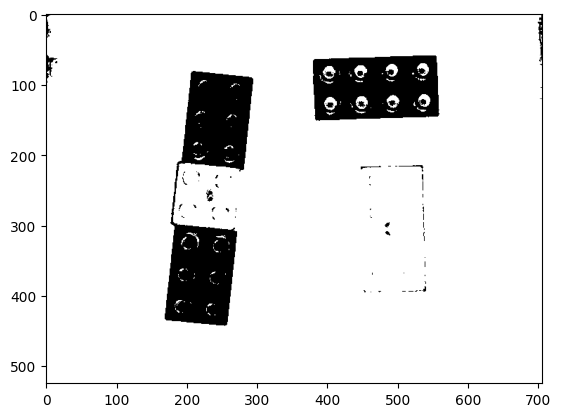

In [14]:
# thresh = cv2.adaptiveThreshold(brainGray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
ret , thresh = cv2.threshold(brainGray,150,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh,'gray',vmin=0,vmax=255)

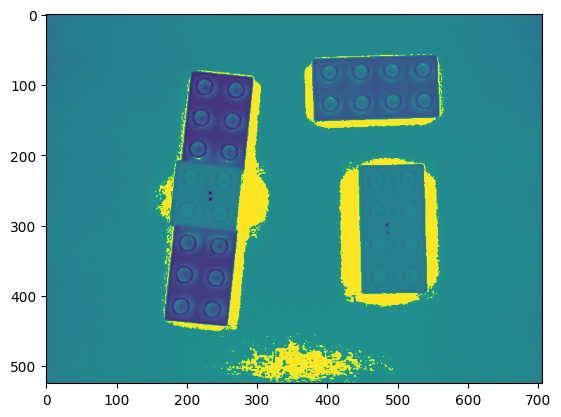

In [15]:
inverted = cv2.bitwise_not(thresh4)
plt.imshow(inverted)

3.3 - Morphological operations

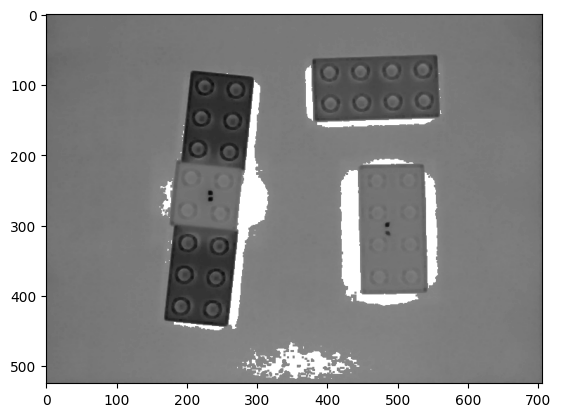

In [16]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11),(-1,-1))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
# erosion = cv2.erode(thresh,kernel,iterations=1)
erosion = cv2.morphologyEx(inverted,cv2.MORPH_ERODE,kernel)
# dilation = cv2.dilate(thresh,kernel,iterations=1)
dilation = cv2.morphologyEx(erosion,cv2.MORPH_DILATE,kernel)
plt.imshow(erosion,'gray',vmin=0,vmax=255)

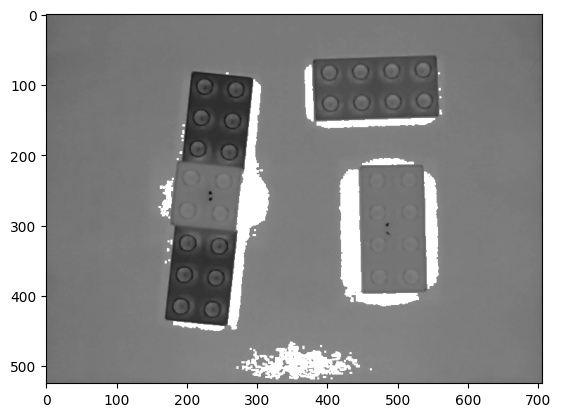

In [17]:
plt.imshow(dilation,'gray',vmin=0,vmax=255)

3.4 - Labelling

In [18]:
contours, hierarchy = cv2.findContours(dilation,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of Contours found = " + str(len(contours))) 
cv2.drawContours(brainImage, contours, -1, (0, 255, 0), 3) 
cv2.imshow('Contours', brainImage) 
cv2.waitKey(0) 
cv2.destroyAllWindows()
regionNum, lb, stats, centroids = cv2.connectedComponentsWithStats(dilation)
graylevel , outImage = bwLabel.labeling(dilation)
print(regionNum)
print(graylevel)

Number of Contours found = 1
2
2


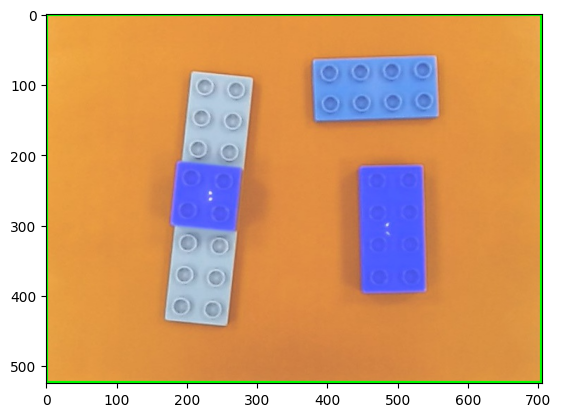

In [19]:
plt.imshow(brainImage,'gray',vmin=0,vmax=255)

In [20]:
image = cv2.imread('imageDatabase/lego11.jpg')

# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Realiza a rotulagem 
num_labels, labeled_image = bwLabel.labeling(gray)

# Cria um mapa de cores com cores aleatórias para cada rótulo
color_map = psColor.CreateColorMap(num_labels)

# Aplica o mapa de cores à imagem rotulada
pseudo_color_image = psColor.Gray2PseudoColor(labeled_image, color_map)

# Encontra contornos na imagem binária
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Desenha os contornos na imagem pseudocolor
cv2.drawContours(pseudo_color_image, contours, -1, (255, 255, 255), thickness=2)

cv2.imshow('Imagem Rotulada em Pseudocor com Contornos', pseudo_color_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)

contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

cv2.imshow('Canny Edges After Contouring', edged)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.drawContours(image, contours, -1, (0, 0, 255), 3)

cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Applying 7x7 Gaussian Blur
blurred = cv2.GaussianBlur(gray_img, (7, 7), 0)

# Applying threshold
threshold = cv2.threshold(blurred, 0, 255,
                          cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Apply the Component analysis function
analysis = cv2.connectedComponentsWithStats(threshold, 4, cv2.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis

# Initialize a new image to store 
# all the output components
output = np.zeros(gray_img.shape, dtype="uint8")

# Loop through each component
for i in range(1, totalLabels):
    # Area of the component
    area = values[i, cv2.CC_STAT_AREA]

    if (area > 140) and (area < 400):
        componentMask = (label_ids == i).astype("uint8") * 255
        output = cv2.bitwise_or(output, componentMask)

cv2.imshow("Image", image)
cv2.imshow("Filtered Components", output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
# img = cv2.imread('imageDatabase/ImTest1.jpg')
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# thres, bw = cv2.threshold(img,127,255,cv2.THRESH_OTSU)
# print(thres)
# plt.imshow(bw,'gray',vmin=0,vmax=255)

In [22]:
# cv2.imshow('BW image',bw)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [23]:
# strElem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11),(-1,-1))

# bw1 = cv2.morphologyEx(bw,cv2.MORPH_CLOSE,kernel)
# plt.imshow(bw1,'gray',vmin=0,vmax=255)

In [24]:
# cv2.imshow('BW image',bw1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Exercicio 6

In [25]:
print('H- angle/2')
print('S- Saturation')
print('V- max value')
print()
bgr_color = np.array([[[100, 0, 0]]], dtype=np.uint8)
print(cv2.cvtColor(bgr_color,cv2.COLOR_BGR2HSV))
print()
bgr_color = np.array([[[0, 100, 0]]], dtype=np.uint8)
print(cv2.cvtColor(bgr_color,cv2.COLOR_BGR2HSV))
print()
bgr_color = np.array([[[0, 0, 100]]], dtype=np.uint8)
print(cv2.cvtColor(bgr_color,cv2.COLOR_BGR2HSV))
print()
bgr_color = np.array([[[0, 100, 100]]], dtype=np.uint8)
print(cv2.cvtColor(bgr_color,cv2.COLOR_BGR2HSV))
print()
bgr_color = np.array([[[100, 0, 100]]], dtype=np.uint8)
print(cv2.cvtColor(bgr_color,cv2.COLOR_BGR2HSV))
print()
bgr_color = np.array([[[100, 100, 0]]], dtype=np.uint8)
print(cv2.cvtColor(bgr_color,cv2.COLOR_BGR2HSV))
print()
bgr_color = np.array([[[100, 100,50]]], dtype=np.uint8)
print(cv2.cvtColor(bgr_color,cv2.COLOR_BGR2HSV))
print()
bgr_color = np.array([[[120, 60, 30]]], dtype=np.uint8)
print(cv2.cvtColor(bgr_color,cv2.COLOR_BGR2HSV))
print()

H- angle/2
S- Saturation
V- max value

[[[120 255 100]]]

[[[ 60 255 100]]]

[[[  0 255 100]]]

[[[ 30 255 100]]]

[[[150 255 100]]]

[[[ 90 255 100]]]

[[[ 90 128 100]]]

[[[110 191 120]]]



In [26]:
image = cv2.imread('imageDatabase/falcon.jpg')
cv2.imshow ('Image', image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
imageNew = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
cv2.imshow ('Image', imageNew)

cv2.waitKey(0)
cv2.destroyAllWindows()


<BarContainer object of 255 artists>

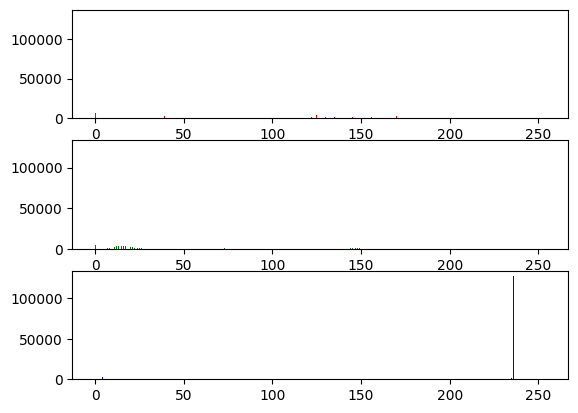

In [28]:
nbinH = 255
binsInH = np.arange(nbinH+1)
histH, binEdgeH = np.histogram(imageNew[:,:,0],bins=binsInH)


nbins = 255
binsInS = np.arange(nbins+1)
histS, binEdgeS = np.histogram(imageNew[:,:,1],bins=binsInS)

nbinV = 255
binsInV = np.arange(nbinV+1)
histV, binEdgeV = np.histogram(imageNew[:,:,2],bins=binsInV)

fig, axs = plt.subplots(3,1)
width = 0.35
axs[0].bar(binsInH[:-1],histH,width,color='r')

axs[1].bar(binsInS[:-1],histS,width,color='g')

axs[2].bar(binsInV[:-1],histV,width,color='b')


0.00381981981981982


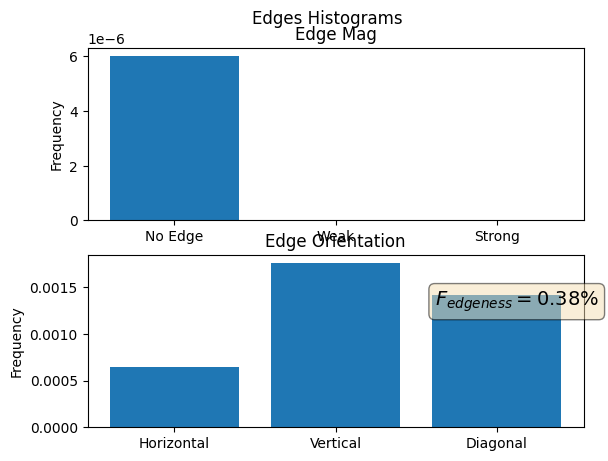

In [34]:
imagem = cv2.imread('imageDatabase/lily-lotus-flowers.jpg')

img = cv2.cvtColor(imagem,cv2.COLOR_BGR2GRAY)

# cv2.imshow('Image',img)

kernelx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

imgDx = cv2.filter2D(img,cv2.CV_16S,kernelx)
imgDy = cv2.filter2D(img,cv2.CV_16S,kernely)

imgMag = np.sqrt(cv2.add(np.float32(imgDx)**2,np.float32(imgDy)**2))
imgMagNorm = imgMag/np.max(imgMag)

edgeT = 0.5
imgEdge = imgMagNorm>=edgeT

imgEdgeInd = np.nonzero(imgMagNorm>=edgeT)

imgEdgeness = np.sum(imgEdge)/imgEdge.size
print(imgEdgeness)

magBins = np.array([0.0,1/3,2/3,1+np.finfo(np.float32).resolution])

Hmag,_ = np.histogram(imgEdgeness,bins=magBins)
HmagN = Hmag/imgMagNorm.size

imgPhase = np.arctan2(imgDy,imgDx)

imgPhaseNorm = imgPhase/(2*np.pi)+0.5

step =1/12

phaseBins = np.arange(0,1+step,step)

Hdir,_ = np.histogram(imgPhaseNorm[imgEdgeInd],bins=phaseBins)

HdirN = np.zeros(3)

HdirN[0] = (Hdir[2]+Hdir[3]+Hdir[8]+Hdir[9])/imgPhaseNorm.size
HdirN[1] = (Hdir[0]+Hdir[5]+Hdir[6]+Hdir[11])/imgPhaseNorm.size
HdirN[2] = (Hdir[1]+Hdir[4]+Hdir[7]+Hdir[10])/imgPhaseNorm.size

fig,axs = plt.subplots(2,1)
fig.subplots_adjust(top=0.9)
t = np.arange(0,3,1)
fig.suptitle('Edges Histograms')
axs[0].set_title('Edge Mag')
axs[0].bar(t,HmagN,tick_label=['No Edge','Weak','Strong'])
axs[0].set_ylabel('Frequency')
axs[1].set_title('Edge Orientation')
axs[1].bar(t,HdirN,tick_label=['Horizontal','Vertical','Diagonal'])
axs[1].set_ylabel('Frequency')

textStr = r'$F_{edgeness}=%.2f$'%(imgEdgeness*100,)+'%'
props = dict(boxstyle='round',facecolor='wheat',alpha=0.5)
axs[1].text(0.7,0.8, textStr, transform=axs[1].transAxes,fontsize=14,verticalalignment='top',bbox=props)

imgDxE = cv2.convertScaleAbs(imgDx)
imgDyE = cv2.convertScaleAbs(imgDy)

cv2.imshow('dxImage',imgDxE)
cv2.imshow('dyImage',imgDyE)
cv2.imshow('Gradient Map',np.uint8(imgMagNorm*255))
cv2.imshow('Gradient Phase',np.uint8(imgPhaseNorm*255))
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()